In [1]:
kaggle_url = 'https://www.kaggle.com/c/ghouls-goblins-and-ghosts-boo/data'

Data Description

In [2]:
# id - id of the creature
# bone_length - average length of bone in the creature, normalized between 0 and 1
# rotting_flesh - percentage of rotting flesh in the creature
# hair_length - average hair length, normalized between 0 and 1
# has_soul - percentage of soul in the creature
# color - dominant color of the creature: 'white','black','clear','blue','green','blood'
# type - target variable: 'Ghost', 'Goblin', and 'Ghoul'

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
hworig = pd.read_csv('train.csv',index_col=0)

hworig.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [10]:
hworig.count().min() == hworig.shape[0] # no missing data

True

(array([ 1.,  1.,  7., 13.,  9., 17., 32., 35., 37., 35., 38., 46., 31.,
        24., 20.,  9.,  8.,  2.,  5.,  1.]),
 array([0.06103182, 0.0988303 , 0.13662878, 0.17442726, 0.21222574,
        0.25002422, 0.2878227 , 0.32562118, 0.36341966, 0.40121814,
        0.43901663, 0.47681511, 0.51461359, 0.55241207, 0.59021055,
        0.62800903, 0.66580751, 0.70360599, 0.74140447, 0.77920295,
        0.81700143]),
 <a list of 20 Patch objects>)

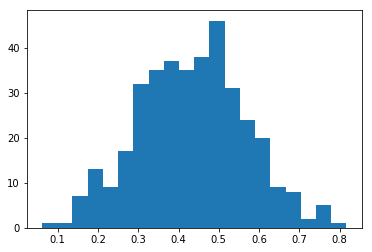

In [12]:
plt.hist(hworig['bone_length'],bins=20) # bone_length is normally distributed

(array([ 1.,  3.,  4., 14., 12., 18., 20., 34., 49., 41., 41., 39., 26.,
        26., 17.,  9.,  8.,  6.,  1.,  2.]),
 array([0.09568665, 0.13752562, 0.17936459, 0.22120356, 0.26304254,
        0.30488151, 0.34672048, 0.38855945, 0.43039843, 0.4722374 ,
        0.51407637, 0.55591534, 0.59775432, 0.63959329, 0.68143226,
        0.72327123, 0.76511021, 0.80694918, 0.84878815, 0.89062712,
        0.93246609]),
 <a list of 20 Patch objects>)

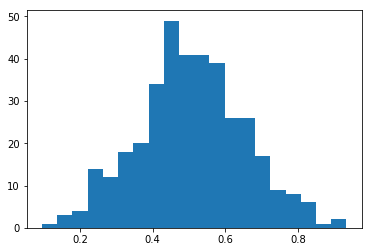

In [13]:
plt.hist(hworig['rotting_flesh'],bins=20) # rotting_flesh is normally distributed

(array([ 6.,  8., 12., 13., 24., 25., 25., 33., 24., 40., 39., 32., 28.,
        22., 16., 11.,  7.,  3.,  1.,  2.]),
 array([0.13460036, 0.17787034, 0.22114033, 0.26441031, 0.30768029,
        0.35095027, 0.39422025, 0.43749024, 0.48076022, 0.5240302 ,
        0.56730018, 0.61057016, 0.65384015, 0.69711013, 0.74038011,
        0.78365009, 0.82692007, 0.87019005, 0.91346004, 0.95673002,
        1.        ]),
 <a list of 20 Patch objects>)

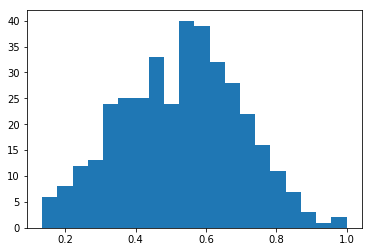

In [14]:
plt.hist(hworig['hair_length'],bins=20) # hair_length is normally distributed

(array([ 4.,  5.,  4.,  9., 12., 20., 32., 30., 32., 44., 32., 33., 29.,
        31., 20.,  9., 18.,  2.,  3.,  2.]),
 array([0.00940162, 0.0557176 , 0.10203359, 0.14834957, 0.19466556,
        0.24098155, 0.28729753, 0.33361352, 0.3799295 , 0.42624549,
        0.47256147, 0.51887746, 0.56519345, 0.61150943, 0.65782542,
        0.7041414 , 0.75045739, 0.79677338, 0.84308936, 0.88940535,
        0.93572133]),
 <a list of 20 Patch objects>)

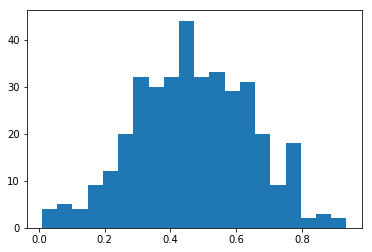

In [16]:
plt.hist(hworig['has_soul'],bins=20) # has_soul is normally distributed

In [17]:
hworig.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [19]:
hworig['color'].unique()

array(['clear', 'green', 'black', 'white', 'blue', 'blood'], dtype=object)

In [20]:
hworig['type'].unique()

array(['Ghoul', 'Goblin', 'Ghost'], dtype=object)

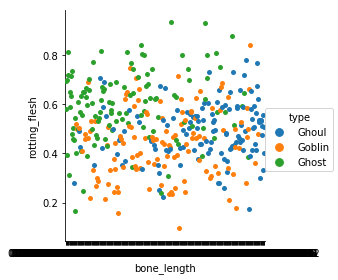

In [23]:
sns.factorplot(x='bone_length',y='rotting_flesh',data=hworig,hue='type',kind='strip')

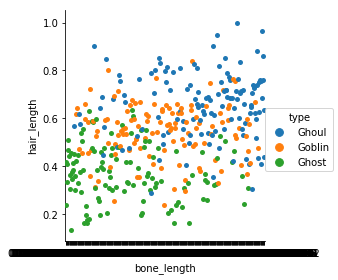

In [24]:
sns.factorplot(x='bone_length',y='hair_length',data=hworig,hue='type',kind='strip')

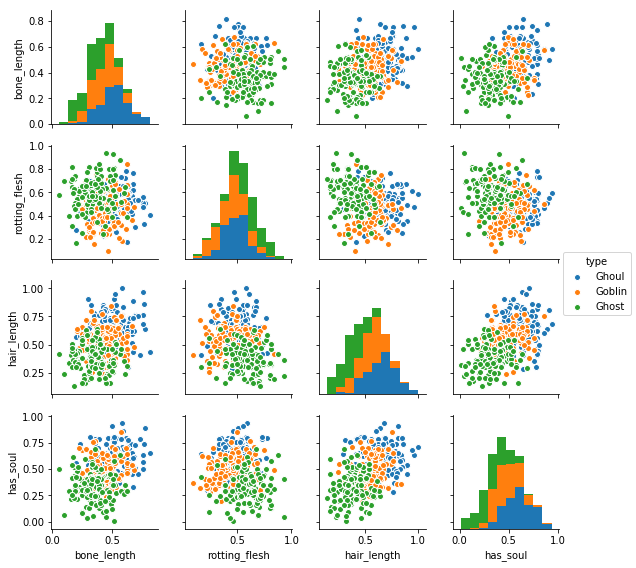

In [29]:
sns.pairplot(data=hworig,hue='type',size=2)

In [36]:
'''
looking at pairplot, there are noticible clusters, with the exception of rotting flesh
'''

'\nlooking at pairplot, there are noticible clusters, with the exception of rotting flesh\n'

In [34]:
hworig.groupby('type').count() # number of each type is pretty even

,bone_length,rotting_flesh,hair_length,has_soul,color
type,,,,,
Ghost,117,117,117,117,117
Ghoul,129,129,129,129,129
Goblin,125,125,125,125,125


In [35]:
hworig.groupby('color').count() # color distribution

,bone_length,rotting_flesh,hair_length,has_soul,type
color,,,,,
black,41,41,41,41,41
blood,12,12,12,12,12
blue,19,19,19,19,19
clear,120,120,120,120,120
green,42,42,42,42,42
white,137,137,137,137,137


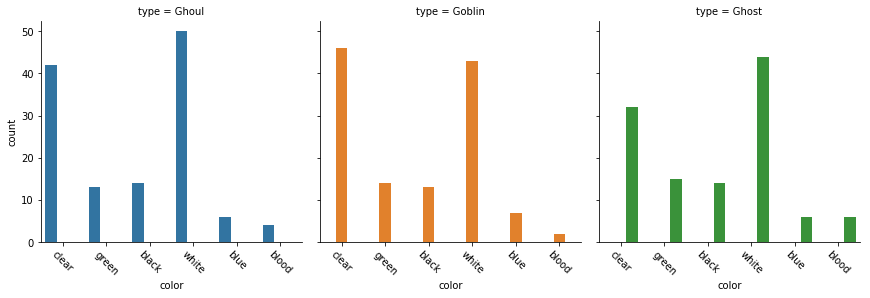

In [50]:
fp = sns.factorplot('color',data=hworig,
                    hue='type',col='type',kind='count')

fp.set_xticklabels(rotation=-45)

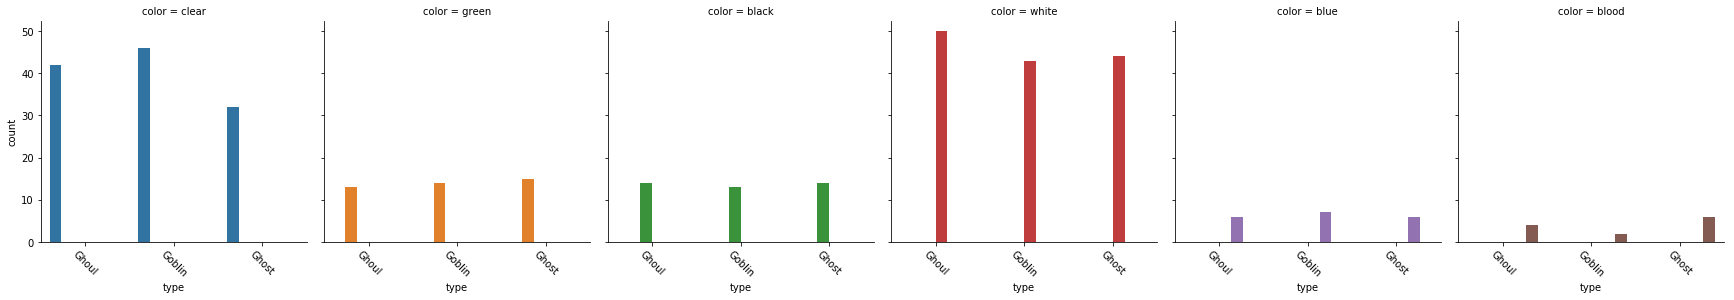

In [52]:
fp = sns.factorplot('type',data=hworig,
                    hue='color',col='color',kind='count')

fp.set_xticklabels(rotation=-45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

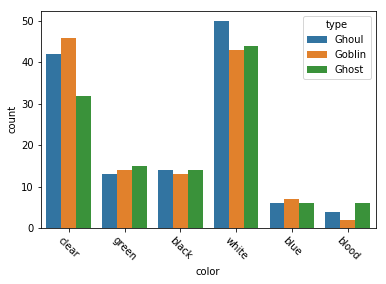

In [48]:
sns.countplot(x='color',data=hworig,hue='type')

plt.xticks(rotation=-45)

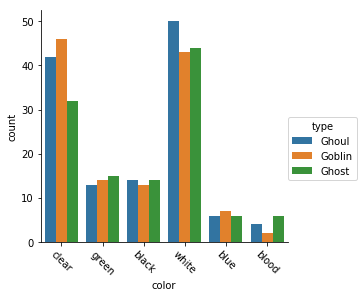

In [53]:
# note that factorplot (without col & kind == count) is the same as countplot

fp2 = sns.factorplot('color',data=hworig,
                    hue='type',kind='count')

fp2.set_xticklabels(rotation=-45)

In [46]:
hworig.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


Melting columns to visualize type difference by color

In [61]:
hw_melt = pd.melt(hworig,id_vars=['color','type'],
                    var_name='Stat')

hw_melt.tail()

,color,type,Stat,value
1479,blue,Goblin,has_soul,0.635689
1480,green,Ghost,has_soul,0.551471
1481,clear,Ghoul,has_soul,0.544003
1482,clear,Ghost,has_soul,0.300618
1483,white,Ghoul,has_soul,0.608384


In [62]:
print(hworig.shape)
print(hw_melt.shape)

(371, 6)
(1484, 4)


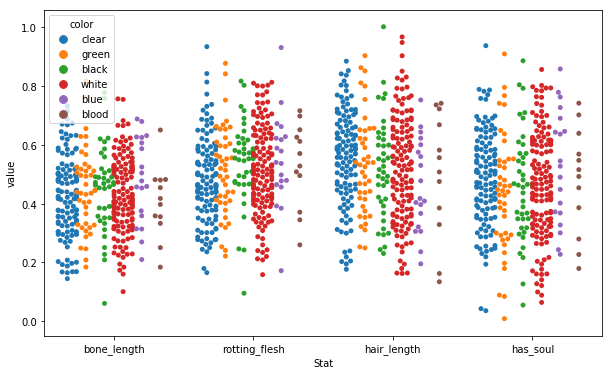

In [63]:
plt.figure(figsize=(10,6))

sns.swarmplot(x='Stat',y='value',data=hw_melt,
              hue='color',dodge=True)

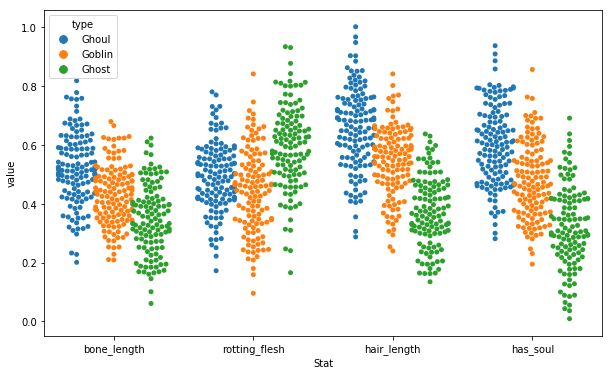

In [66]:
plt.figure(figsize=(10,6))

sns.swarmplot(x='Stat',y='value',data=hw_melt,
              hue='type',dodge=True)

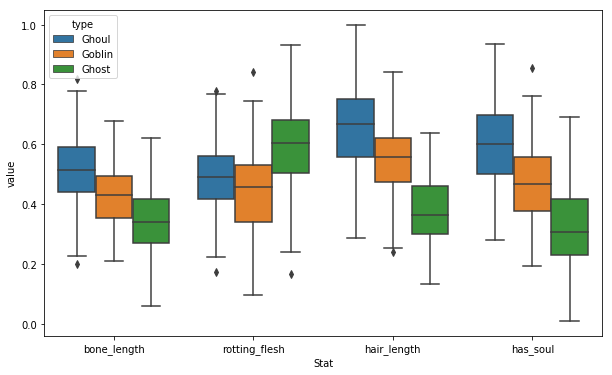

In [70]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Stat',y='value',data=hw_melt,
              hue='type',dodge=True)

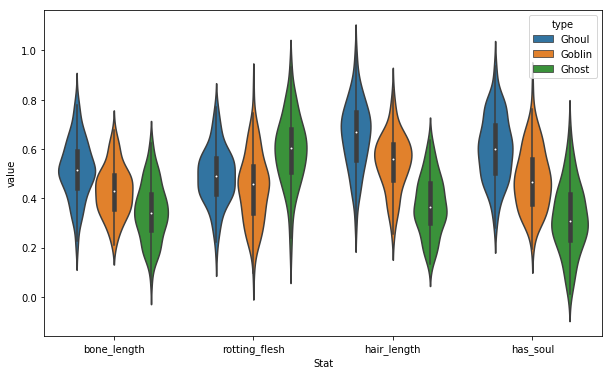

In [71]:
plt.figure(figsize=(10,6))

sns.violinplot(x='Stat',y='value',data=hw_melt,
              hue='type',dodge=True)

In [72]:
hworig.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


Examining test.csv

In [73]:
hwtest = pd.read_csv('test.csv',index_col=0)

hwtest.head()

,bone_length,rotting_flesh,hair_length,has_soul,color
id,,,,,
3,0.471774,0.387937,0.706087,0.698537,black
6,0.427332,0.645024,0.565558,0.451462,white
9,0.549602,0.491931,0.660387,0.449809,black
10,0.638095,0.682867,0.471409,0.356924,white
13,0.361762,0.583997,0.377256,0.276364,black


In [75]:
hwtest.shape # test.csv is missing type column

(529, 5)

In [77]:
# continue to pt 02 for ML classification